Importando as bibliotecas

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from scipy.stats import norm
import math

# Desafio 1: Entendendo o consumidor

Importando o dataset

In [174]:
consumidor_df = pd.read_csv("desafio-01-consumidor.csv")
consumidor_df.head()

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


Primeiras análises do dataset

i - usando o info() para imprimir as informações do dataset (apesar desse comando já trazer muitas das informações que serão obtidas com os subsequentes métodos ou operações)



In [175]:
consumidor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_cliente    203 non-null    object
 1   idade         203 non-null    int64 
 2   renda         203 non-null    int64 
 3   produto       203 non-null    object
 4   regiao-BR     203 non-null    object
 5   pre-pandemia  203 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.6+ KB


ii - describe() para ter um resumo estatístico do dataframe

In [176]:
consumidor_df.describe()

,idade,renda,pre-pandemia
count,203.000000,203.000000,203.000000
mean,42.403941,11586.364532,0.497537
std,14.400715,6288.016708,0.501230
min,15.000000,110.000000,0.000000
25%,31.000000,6705.000000,0.000000
50%,41.000000,11145.000000,0.000000
75%,53.000000,15590.500000,1.000000
max,80.000000,30000.000000,1.000000


iii - columns para imprimir as colunas existentes

In [177]:
consumidor_df.columns

Index(['id_cliente', 'idade', 'renda', 'produto', 'regiao-BR', 'pre-pandemia'], dtype='object')

iv - dtypes para o tipo de dado de cada coluna 

In [178]:
consumidor_df.dtypes

id_cliente      object
idade            int64
renda            int64
produto         object
regiao-BR       object
pre-pandemia     int64
dtype: object

v - contabilizando o número de células vazias por coluna

In [179]:
consumidor_df.isna().sum()

id_cliente      0
idade           0
renda           0
produto         0
regiao-BR       0
pre-pandemia    0
dtype: int64

vi - shape para conhecer o tamanho do dataframe

In [180]:
consumidor_df.shape

(203, 6)

vii - unique() conhecer os valores únicos das colunas

In [181]:
consumidor_df['pre-pandemia'].unique()

array([1, 0])

In [182]:
consumidor_df['produto'].unique()

array(['batom', 'desodorante', 'sombra', 'perfume', 'antissinais', 'base'],
      dtype=object)

In [183]:
consumidor_df['regiao-BR'].unique()

array(['Sudeste', 'Nordeste', 'Centro-Oeste', 'Sul', 'Norte'],
      dtype=object)

Criando dois novos dataframes pré e pós pandemia

In [184]:
pre_pandemia = consumidor_df[consumidor_df['pre-pandemia'] == 1]
pre_pandemia

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1
...,...,...,...,...,...,...
96,XXXXXXX80,32,6251,antissinais,Norte,1
97,XXXXXXX92,43,2616,batom,Sul,1
98,XXXXXXX65,54,2324,antissinais,Norte,1
99,XXXXXXX79,61,12278,base,Centro-Oeste,1


In [185]:
pos_pandemia = consumidor_df[consumidor_df['pre-pandemia'] == 0]
pos_pandemia

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
101,XXXXXXX67,35,25959,batom,Sul,0
102,XXXXXXX60,35,1995,desodorante,Nordeste,0
103,XXXXXXX48,53,23314,antissinais,Centro-Oeste,0
104,XXXXXXX67,44,16693,antissinais,Centro-Oeste,0
105,XXXXXXX59,37,14631,base,Nordeste,0
...,...,...,...,...,...,...
198,XXXXXXX25,46,16918,desodorante,Sul,0
199,XXXXXXX50,43,10930,antissinais,Norte,0
200,XXXXXXX65,48,10246,perfume,Nordeste,0
201,XXXXXXX61,47,12337,batom,Sudeste,0


## 1 - Entenda a distribuição de variáveis como de idade / renda / regiao /produtos mais comprados antes e depois da pandemia

## a. Identifique as distribuições
## b. Plote histogramas / boxplots


Quantificando os registros pré e pós pandemia

In [186]:
frequencia = consumidor_df['pre-pandemia'].value_counts()
frequencia

0    102
1    101
Name: pre-pandemia, dtype: int64

In [187]:
# normalizando o resultado

percentual = consumidor_df['pre-pandemia'].value_counts(normalize = True).round(4) * 100
percentual

0    50.25
1    49.75
Name: pre-pandemia, dtype: float64

In [188]:
dist_freq_qualitativa = pd.DataFrame({'frequencia': frequencia, 'porcentagem (%)': percentual})
dist_freq_qualitativa.rename(index = {0: 'pós pandemia', 1: 'pré pandemia'}, inplace = True)
dist_freq_qualitativa.rename_axis('Período', axis = 'columns', inplace  = True)
dist_freq_qualitativa

Período,frequencia,porcentagem (%)
pós pandemia,102,50.25
pré pandemia,101,49.75


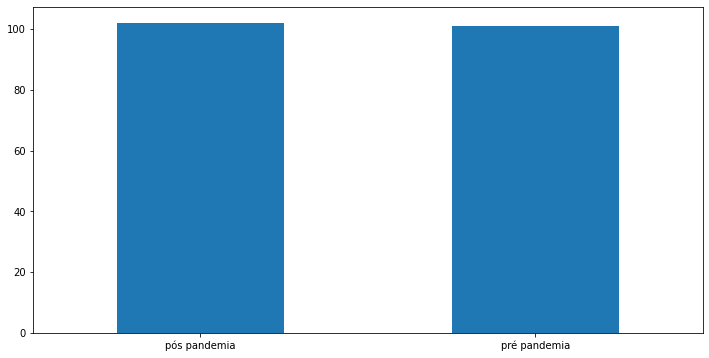

In [189]:
dist_freq_qualitativa['frequencia'].plot.bar(figsize = (12,6), rot=0);

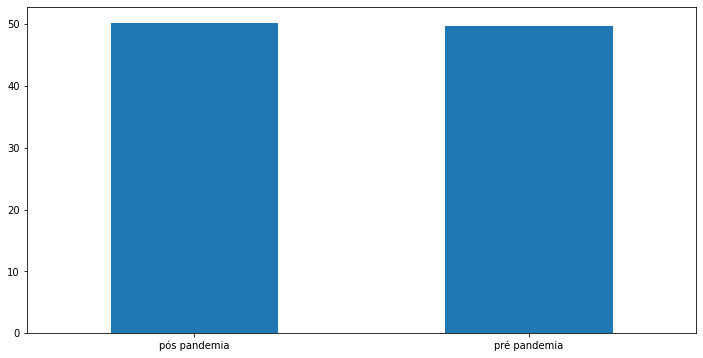

In [190]:
dist_freq_qualitativa['porcentagem (%)'].plot.bar(figsize = (12,6), rot=0);

Analisando a região

In [191]:
periodo = {
    0: 'pós pandemia',
    1: 'pré pandemia'
}

In [192]:
frequencia = pd.crosstab(consumidor_df['pre-pandemia'], 
                         consumidor_df['regiao-BR'])
frequencia.rename(index = periodo, inplace = True)
frequencia.rename_axis('Período', axis = 'index', inplace  = True)
frequencia

regiao-BR,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
Período,,,,,
pós pandemia,8,25,9,18,42
pré pandemia,17,26,8,21,29


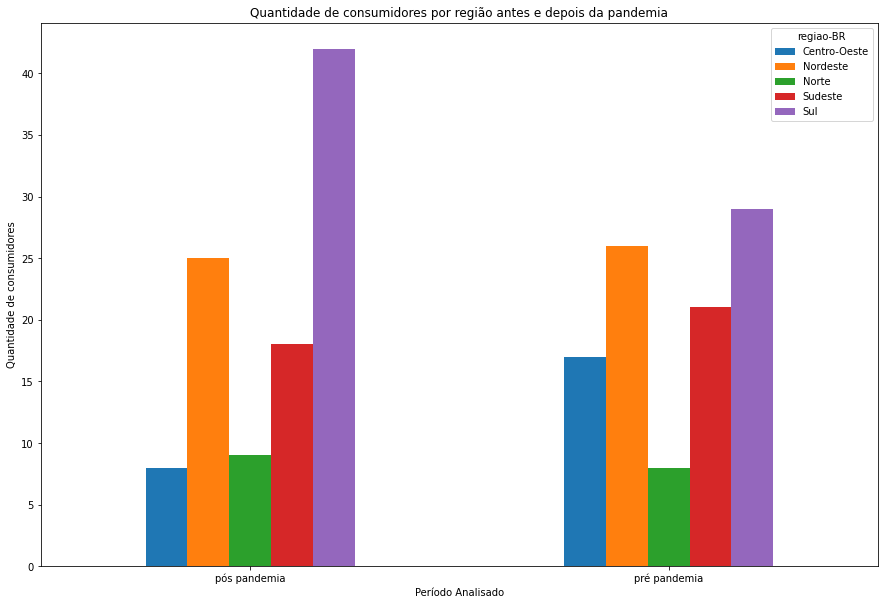

In [193]:
frequencia.plot.bar(figsize = (15,10), rot=0)
plt.xlabel("Período Analisado")
plt.ylabel("Quantidade de consumidores")
plt.title("Quantidade de consumidores por região antes e depois da pandemia")
plt.show;

Analisando os produtos

In [194]:
frequencia_1 = pd.crosstab(consumidor_df['pre-pandemia'], 
                         consumidor_df['produto'])
frequencia_1.rename(index = periodo, inplace = True)
frequencia_1.rename_axis('Período', axis = 'index', inplace  = True)
frequencia_1

produto,antissinais,base,batom,desodorante,perfume,sombra
Período,,,,,,
pós pandemia,20,4,15,46,8,9
pré pandemia,9,3,61,20,4,4


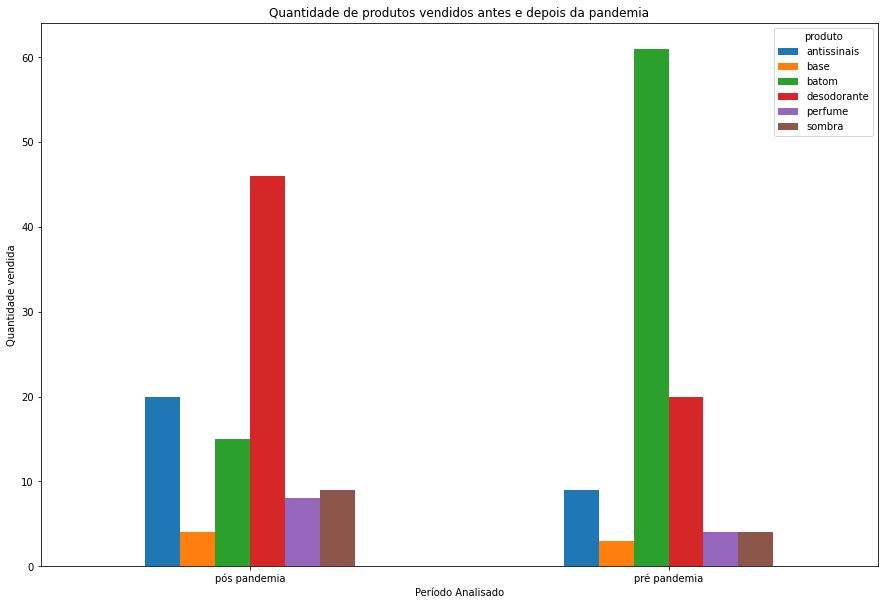

In [195]:
frequencia_1.plot.bar(figsize = (15,10), rot=0)
plt.xlabel("Período Analisado")
plt.ylabel("Quantidade vendida")
plt.title("Quantidade de produtos vendidos antes e depois da pandemia")
plt.show;

Analisando as idades


In [196]:
#Analisando o conjunto como um todo

mais_velho = consumidor_df['idade'].max()
mais_novo = consumidor_df['idade'].min()
media_idade = consumidor_df['idade'].mean()
mediana_idade = consumidor_df['idade'].median()
moda_idade = consumidor_df['idade'].mode()
desvio_padrao_idade = consumidor_df['idade'].std()
print("ANÁLISES DOS DADOS GERAIS:\n")
print("Idade da pessoa mais velha %i" % mais_velho)
print("Idade da pessoa mais nova %i" % mais_novo)
print("Média das idades %i" % media_idade)
print("Mediana das idades %i" % mediana_idade)
print("Moda das idades %i" % moda_idade)
print("Desvio padrão das idades %i" % desvio_padrao_idade)

ANÁLISES DOS DADOS GERAIS:

Idade da pessoa mais velha 80
Idade da pessoa mais nova 15
Média das idades 42
Mediana das idades 41
Moda das idades 37
Desvio padrão das idades 14


In [197]:
#Analisando pré-pandemia 

mais_velho = pre_pandemia['idade'].max()
mais_novo = pre_pandemia['idade'].min()
media_idade = pre_pandemia['idade'].mean()
mediana_idade = pre_pandemia['idade'].median()
desvio_padrao_idade = pre_pandemia['idade'].std()
print("ANÁLISES PRÉ-PANDEMIA:\n")
print("Idade da pessoa mais velha %i" % mais_velho)
print("Idade da pessoa mais nova %i" % mais_novo)
print("Média das idades %i" % media_idade)
print("Mediana das idades %i" % mediana_idade)
print("Desvio padrão das idades %i" % desvio_padrao_idade)

ANÁLISES PRÉ-PANDEMIA:

Idade da pessoa mais velha 80
Idade da pessoa mais nova 16
Média das idades 39
Mediana das idades 37
Desvio padrão das idades 15


In [198]:
#Analisando pós-pandemia 

mais_velho = pos_pandemia['idade'].max()
mais_novo = pos_pandemia['idade'].min()
media_idade = pos_pandemia['idade'].mean()
mediana_idade = pos_pandemia['idade'].median()
desvio_padrao_idade = pos_pandemia['idade'].std()
print("ANÁLISES PÓS-PANDEMIA:\n")
print("Idade da pessoa mais velha %i" % mais_velho)
print("Idade da pessoa mais nova %i" % mais_novo)
print("Média das idades %i" % media_idade)
print("Mediana das idades %i" % mediana_idade)
print("Desvio padrão das idades %i" % desvio_padrao_idade)

ANÁLISES PÓS-PANDEMIA:

Idade da pessoa mais velha 77
Idade da pessoa mais nova 15
Média das idades 44
Mediana das idades 46
Desvio padrão das idades 13


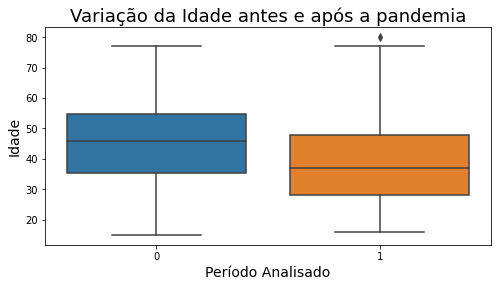

In [199]:
ax = sns.boxplot(x='pre-pandemia', y = 'idade', data = consumidor_df)
ax.set_title('Variação da Idade antes e após a pandemia', fontsize=18)
ax.set_xlabel('Período Analisado', fontsize=14)
ax.set_ylabel('Idade', fontsize=14)
ax.figure.set_size_inches(8, 4)
plt.xticks(rotation = 0);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


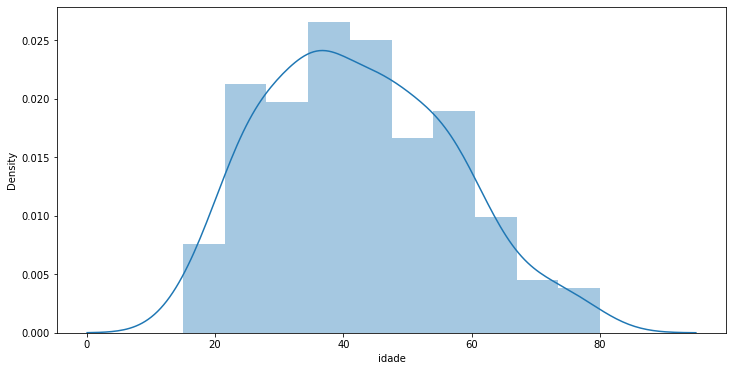

In [200]:
ax = sns.distplot(consumidor_df['idade'], bins=10)
ax.figure.set_size_inches(12,6)
ax;

Analisando a renda

In [201]:
maior_renda= consumidor_df[consumidor_df['pre-pandemia'] == 1]['renda'].max()
maior_renda

24090

In [202]:
#Analisando o conjunto como um todo

maior_renda= consumidor_df['renda'].max()
menor_renda = consumidor_df['renda'].min()
media_renda = consumidor_df['renda'].mean()
mediana_renda = consumidor_df['renda'].median()
desvio_padrao_renda = consumidor_df['renda'].std()
print("ANÁLISES DOS DADOS GERAIS:\n")
print("Maior renda %0.2f" % maior_renda)
print("Menor renda %0.2f" % menor_renda)
print("Média da renda %0.2f" % media_renda)
print("Mediana da renda %0.2f" % mediana_renda)
print("Desvio padrão da renda %0.2f" % desvio_padrao_renda)

ANÁLISES DOS DADOS GERAIS:

Maior renda 30000.00
Menor renda 110.00
Média da renda 11586.36
Mediana da renda 11145.00
Desvio padrão da renda 6288.02


In [203]:
#Analisando pré-pandemia 

maior_renda= pre_pandemia['renda'].max()
menor_renda = pre_pandemia['renda'].min()
media_renda = pre_pandemia['renda'].mean()
mediana_renda = pre_pandemia['renda'].median()
desvio_padrao_renda = pre_pandemia['renda'].std()
print("ANÁLISES PRÉ-PANDEMIA:\n")
print("Maior renda %0.2f" % maior_renda)
print("Menor renda %0.2f" % menor_renda)
print("Média da renda %0.2f" % media_renda)
print("Mediana da renda %0.2f" % mediana_renda)
print("Desvio padrão da renda %0.2f" % desvio_padrao_renda)

ANÁLISES PRÉ-PANDEMIA:

Maior renda 24090.00
Menor renda 110.00
Média da renda 9180.64
Mediana da renda 7488.00
Desvio padrão da renda 6007.68


In [204]:
#Analisando depois da pandemia

maior_renda= pos_pandemia['renda'].max()
menor_renda = pos_pandemia['renda'].min()
media_renda = pos_pandemia['renda'].mean()
mediana_renda = pos_pandemia['renda'].median()
desvio_padrao_renda = pos_pandemia['renda'].std()
print("ANÁLISES PÓS-PANDEMIA:\n")
print("Maior renda %0.2f" % maior_renda)
print("Menor renda %0.2f" % menor_renda)
print("Média da renda %0.2f" % media_renda)
print("Mediana da renda %0.2f" % mediana_renda)
print("Desvio padrão da renda %0.2f" % desvio_padrao_renda)

ANÁLISES PÓS-PANDEMIA:

Maior renda 30000.00
Menor renda 1995.00
Média da renda 13968.50
Mediana da renda 13380.50
Desvio padrão da renda 5641.38


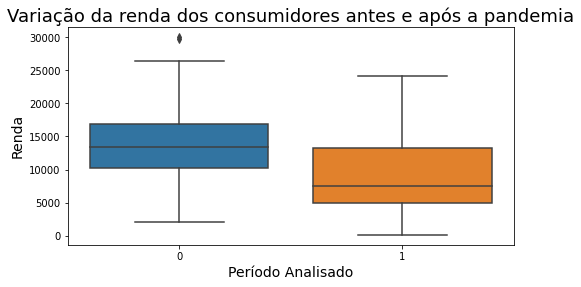

In [205]:
ax = sns.boxplot(x='pre-pandemia', y = 'renda', data = consumidor_df)
ax.set_title('Variação da renda dos consumidores antes e após a pandemia', fontsize=18)
ax.set_xlabel('Período Analisado', fontsize=14)
ax.set_ylabel('Renda', fontsize=14)
ax.figure.set_size_inches(8, 4)
plt.xticks(rotation = 0);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


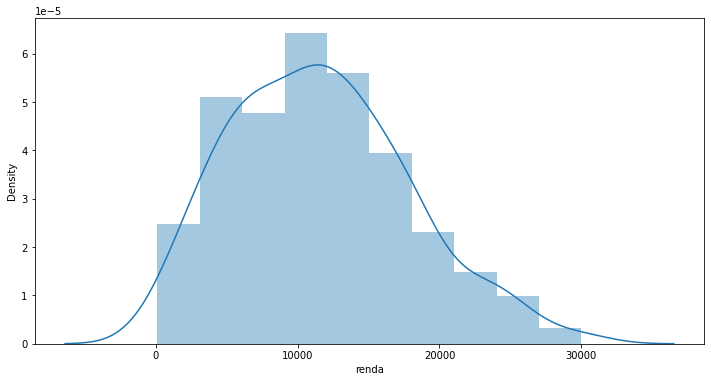

In [206]:
ax = sns.distplot(consumidor_df['renda'], bins=10)
ax.figure.set_size_inches(12,6)
ax;

## 2 - Você notou diferenças nítidas pré e pós pandemia? Como você poderia provar estatisticamente que essas diferenças são significativas ? (pergunta extra)

Em termos de quantidade, não houve alteração significativa na quantidade vendida antes e depois da pandemia.

*   Região:
Antes da pandemia, não tinha nenhuma região com um consumo mais acentuado comparada às demais, porém após a pandemia, a região Sul passou a ter um papel muito mais acentuado comparado as demais  
*   Produtos:
Antes da pandemia, o produto mais vendido era o batom, e após a pandemia passou a ser o desodorante, seguido dos antissinais e pelo batom
*   Renda: a renda média dos consumidores pós pandemia aumentou, e a dispersão foi menor
*   Idade: a idade média pós pandemia aumentou em comparação a média pré pandemia





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


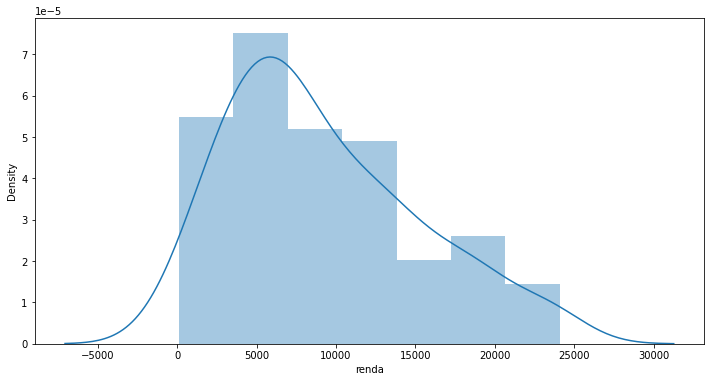

In [207]:
ax = sns.distplot(pre_pandemia['renda'])
ax.figure.set_size_inches(12,6)
ax;

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


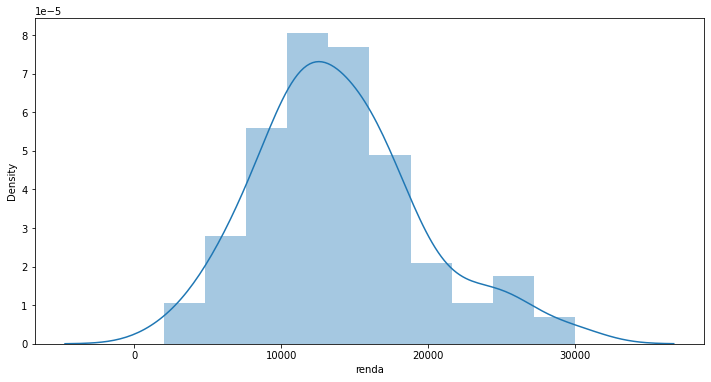

In [208]:
ax = sns.distplot(pos_pandemia['renda'])
ax.figure.set_size_inches(12,6)
ax;

## 3 - Suponha agora que os dados recebidos são somente uma amostra da sua população total de clientes. Suponha que a sua "população" de clientes verdadeira é de 100000. Qual o tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A base informada é suficiente? E com uma margem de erro de 10%?

Para a população finita

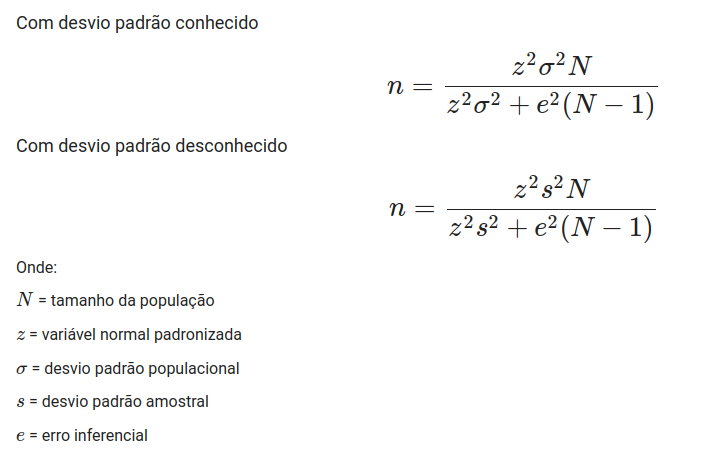

**Observações:**

O desvio padrão ( σ  ou  s ) e o erro ( e ) devem estar na mesma unidade de medida.

Quando o erro ( e ) for representado em termos percentuais, deve ser interpretado como um percentual relacionado à média.

In [209]:
N = 100000
N

100000

In [210]:
# Para 95% de confiança

z = norm.ppf(0.975)
z

1.959963984540054

In [211]:
# analisando apenas a parte da renda, tem-se 

media_renda = round(pre_pandemia['renda'].mean(), 2)
std_renda = round(pre_pandemia['renda'].std(), 2)
print(f"Média pré pandemia {media_renda}, desvio padrão pré pandemia {std_renda}")

Média pré pandemia 9180.64, desvio padrão pré pandemia 6007.68


In [212]:
# analisando apenas a parte da idade, tem-se 

media_idade = round(pre_pandemia['idade'].mean(), 2)
std_idade = round(pre_pandemia['idade'].std(), 2)
print(f"Média pré pandemia {media_idade}, desvio padrão pré pandemia {std_idade}")

Média pré pandemia 39.88, desvio padrão pré pandemia 15.02


In [213]:
s_renda = std_renda
s_renda

6007.68

In [214]:
# erro, percentual da média, 2% da média da renda
e2 = 0.02 * media_renda
e2

183.6128

In [215]:
# erro, percentual da média, 2% da média da renda
e2 = 0.02 * media_renda
e2

183.6128

In [216]:
# erro, percentual da média, 10% da média da renda
e10 = 0.1 * media_renda
e10

918.064

In [217]:
s_idade = std_idade
s_idade

15.02

In [218]:
# erro, percentual da média, 2% da média da idade
e2_id = 0.02 * media_idade
e2_id

0.7976000000000001

In [219]:
# erro, percentual da média, 10% da média da idade
e10_id = 0.1 * media_idade
e10_id

3.9880000000000004

In [220]:
def tamanho_amostra(N, z, s, e):
  n = ((z**2) * (s**2) * N) / (((z**2) * (s**2))  + ((e**2) * (N - 1) ))
  n_int = int(n.round())
  return n_int

In [221]:
amostra_2_erro = tamanho_amostra(N, z, s_renda, e2)
print(f"Para 2% de margem de erro, o tamanho da amostra deve ser de {amostra_2_erro}")

Para 2% de margem de erro, o tamanho da amostra deve ser de 3950


In [222]:
amostra_10_erro = tamanho_amostra(N, z, s_renda, e10)
print(f"Para 10% de margem de erro, o tamanho da amostra deve ser de {amostra_10_erro}")

Para 10% de margem de erro, o tamanho da amostra deve ser de 164


In [223]:
amostra_2_erro_id = tamanho_amostra(N, z, s_idade, e2_id)
print(f"Para 10% de margem de erro, baseado na idade, o tamanho da amostra deve ser de {amostra_2_erro_id}")

Para 10% de margem de erro, baseado na idade, o tamanho da amostra deve ser de 1344


In [224]:
amostra_10_erro_id = tamanho_amostra(N, z, s_idade, e10_id)
print(f"Para 10% de margem de erro, baseado na idade, o tamanho da amostra deve ser de {amostra_10_erro_id}")

Para 10% de margem de erro, baseado na idade, o tamanho da amostra deve ser de 54


Considerando a fórmula:
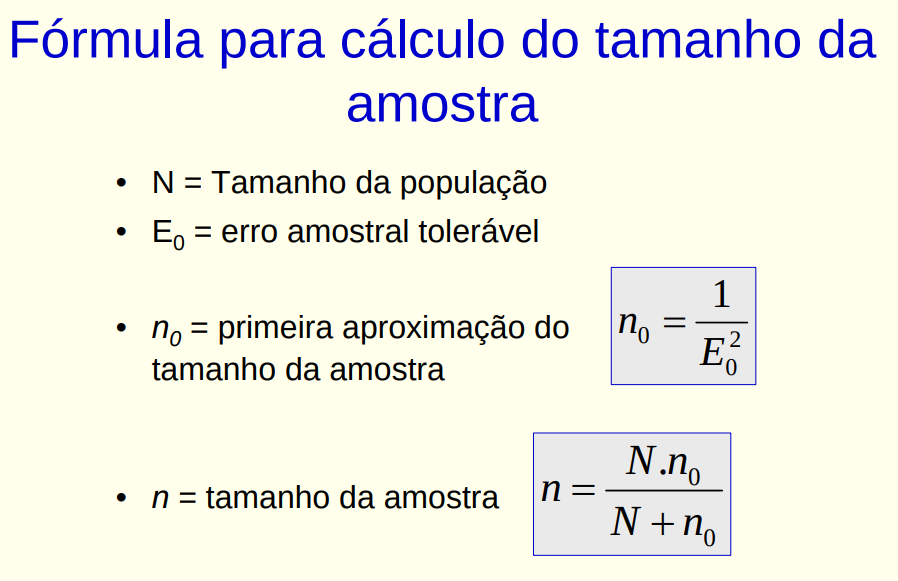

In [225]:
def tamanho_amostra(N, E):
  n0 = np.array([((N * (1/(e**2))) / (N + ( 1/(e**2) ))) for e in E]) 
  return n0

In [226]:
N = 100000
N

100000

In [227]:
lista_e = np.array([x for x in range(1, 101, 1)]) / 100
lista_e

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [228]:
lista_n = tamanho_amostra(N, lista_e)
lista_n = lista_n.astype(int)
lista_n

array([9090, 2439, 1098,  621,  398,  277,  203,  156,  123,   99,   82,
         69,   59,   50,   44,   39,   34,   30,   27,   24,   22,   20,
         18,   17,   15,   14,   13,   12,   11,   11,   10,    9,    9,
          8,    8,    7,    7,    6,    6,    6,    5,    5,    5,    5,
          4,    4,    4,    4,    4,    3,    3,    3,    3,    3,    3,
          3,    3,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          0])

In [229]:
tam_amostra = {'Erro': lista_e, 'Tamanho': lista_n}
tam_amostra_df = pd.DataFrame(data=tam_amostra)
tam_amostra_df

,Erro,Tamanho
0,0.01,9090
1,0.02,2439
2,0.03,1098
3,0.04,621
4,0.05,398
...,...,...
95,0.96,1
96,0.97,1
97,0.98,1
98,0.99,1


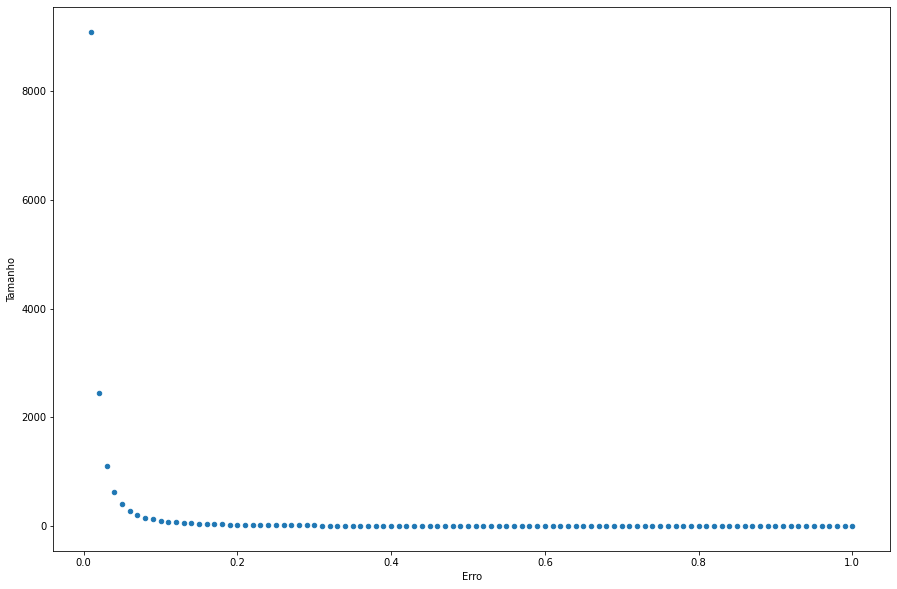

In [230]:
from IPython.core.pylabtools import figsize
tam_amostra_df.plot(x = 'Erro', y = 'Tamanho', kind = 'scatter', figsize=(15,10));

# Desafio 2: Determinando o Estoque de Segurança

In [265]:
estoque_df = pd.read_csv("desafio_02_estoque.csv")
estoque_df

,data,vendas-iogurte,lead-time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5
...,...,...,...
365,2022-01-02,5120,5
366,2022-01-09,4968,3
367,2022-01-16,5095,6
368,2022-01-23,4941,6


Explorando os dados do DataFrame

In [232]:
estoque_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   data            370 non-null    object
 1   vendas-iogurte  370 non-null    int64 
 2   lead-time       370 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.8+ KB


Utilizando o describe() para ter uma visão estatística geral das colunas numéricas do DataFrame

In [267]:
estoque_df.describe()

,vendas-iogurte,lead-time
count,370.000000,370.000000
mean,4999.170270,5.094595
std,77.285068,1.578728
min,4811.000000,1.000000
25%,4947.000000,4.000000
50%,4996.000000,5.000000
75%,5054.000000,6.000000
max,5233.000000,9.000000


Criando a coluna vendas_medias_diarias

In [268]:
estoque_df['vendas_medias_diarias'] = estoque_df['vendas-iogurte'] / 7 
estoque_df

,data,vendas-iogurte,lead-time,vendas_medias_diarias
0,2015-01-04,5083,4,726.142857
1,2015-01-11,4936,3,705.142857
2,2015-01-18,5051,6,721.571429
3,2015-01-25,4846,4,692.285714
4,2015-02-01,5003,5,714.714286
...,...,...,...,...
365,2022-01-02,5120,5,731.428571
366,2022-01-09,4968,3,709.714286
367,2022-01-16,5095,6,727.857143
368,2022-01-23,4941,6,705.857143


Criando a coluna ano

In [269]:
ano = []
for i in range(len(estoque_df)):
  ano.append(estoque_df['data'].iloc[i][:4])
estoque_df['ano'] = ano
estoque_df

,data,vendas-iogurte,lead-time,vendas_medias_diarias,ano
0,2015-01-04,5083,4,726.142857,2015
1,2015-01-11,4936,3,705.142857,2015
2,2015-01-18,5051,6,721.571429,2015
3,2015-01-25,4846,4,692.285714,2015
4,2015-02-01,5003,5,714.714286,2015
...,...,...,...,...,...
365,2022-01-02,5120,5,731.428571,2022
366,2022-01-09,4968,3,709.714286,2022
367,2022-01-16,5095,6,727.857143,2022
368,2022-01-23,4941,6,705.857143,2022


In [270]:
estoque_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data                   370 non-null    object 
 1   vendas-iogurte         370 non-null    int64  
 2   lead-time              370 non-null    int64  
 3   vendas_medias_diarias  370 non-null    float64
 4   ano                    370 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 14.6+ KB


In [271]:
estoque_df.describe()

,vendas-iogurte,lead-time,vendas_medias_diarias
count,370.000000,370.000000,370.000000
mean,4999.170270,5.094595,714.167181
std,77.285068,1.578728,11.040724
min,4811.000000,1.000000,687.285714
25%,4947.000000,4.000000,706.714286
50%,4996.000000,5.000000,713.714286
75%,5054.000000,6.000000,722.000000
max,5233.000000,9.000000,747.571429


## 1 - Analise os dados das vendas e do lead time. Eles seguem uma distribuição normal? Que características você identificou para chegar a essa conclusão?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


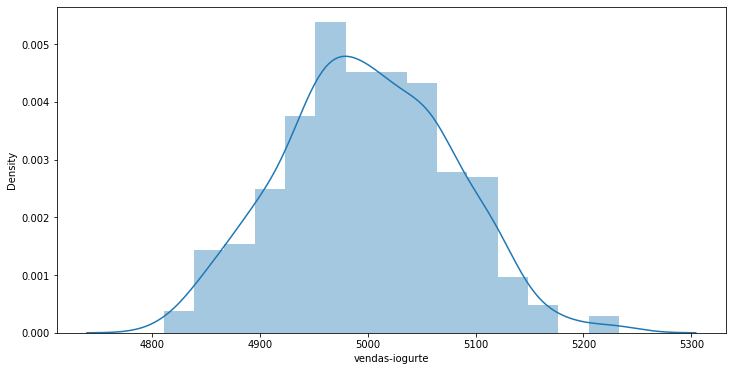

In [272]:
ax = sns.distplot(estoque_df['vendas-iogurte'])
ax.figure.set_size_inches(12,6)
ax;

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


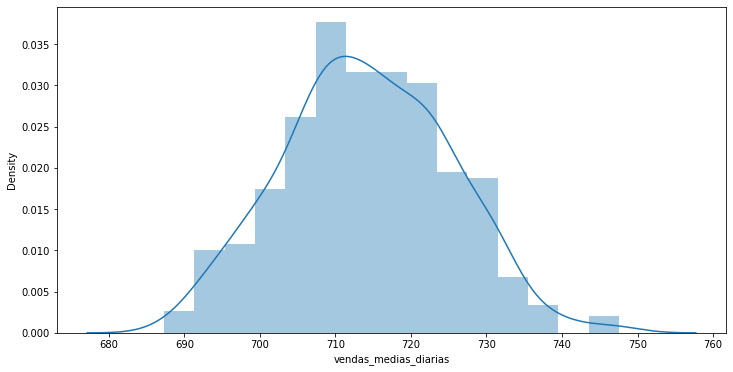

In [274]:
ax = sns.distplot(estoque_df['vendas_medias_diarias'])
ax.figure.set_size_inches(12,6)
ax;

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


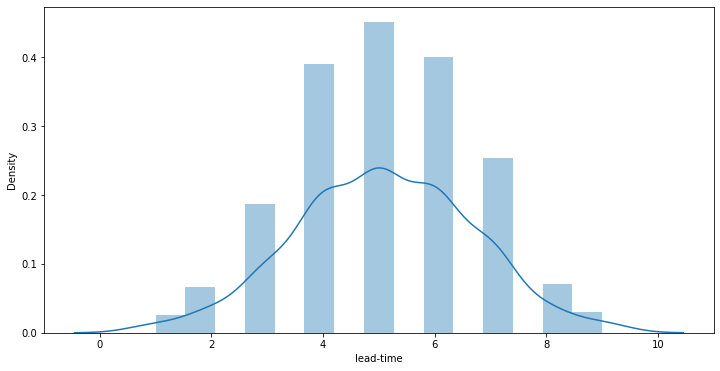

In [275]:
ax = sns.distplot(estoque_df['lead-time'])
ax.figure.set_size_inches(12,6)
ax;

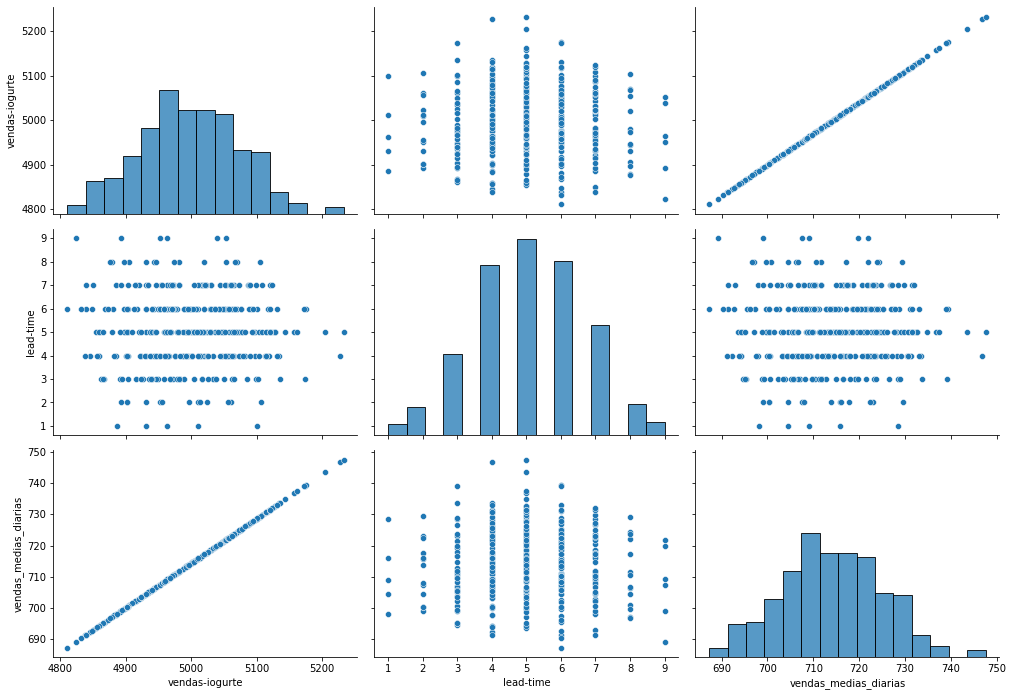

In [276]:
ax = sns.pairplot(estoque_df)
ax.figure.set_size_inches(15,10)
ax;

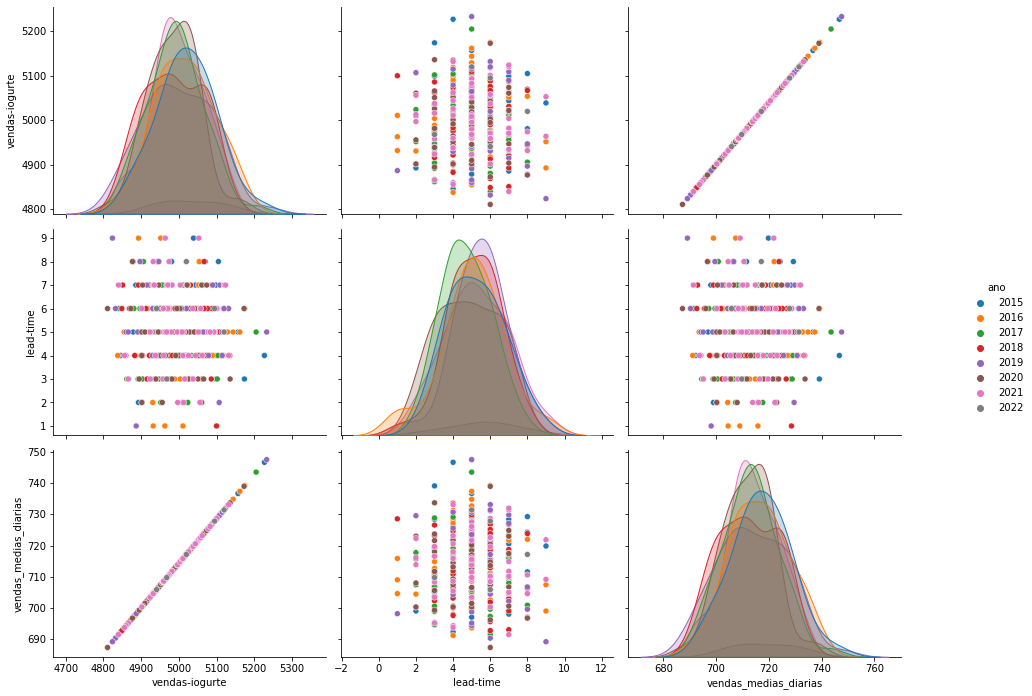

In [277]:
ax = sns.pairplot(estoque_df, hue='ano')
ax.figure.set_size_inches(15,10)
ax;

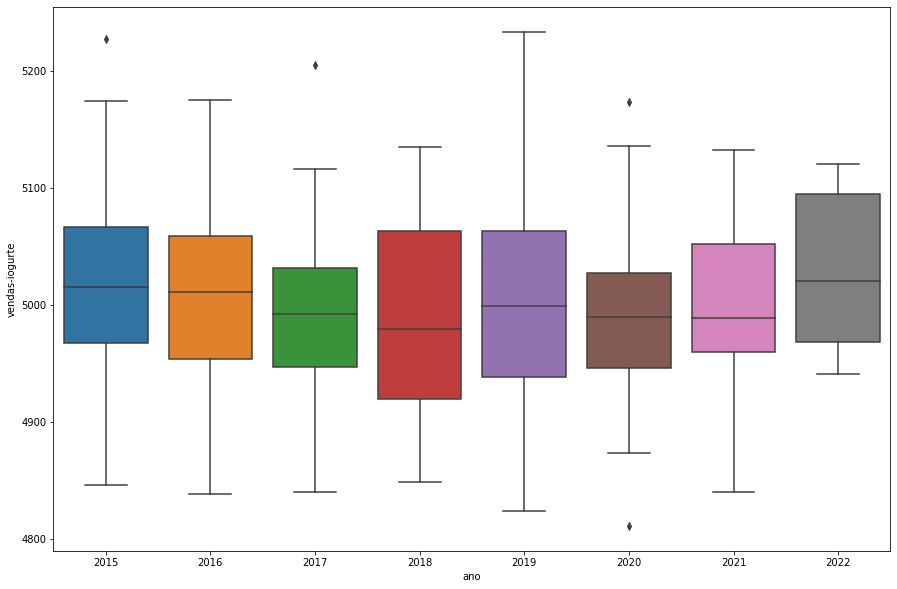

In [278]:
ax = sns.boxplot(x='ano', y = 'vendas-iogurte', data = estoque_df)
ax.figure.set_size_inches(15,10)
plt.xticks(rotation = 0);

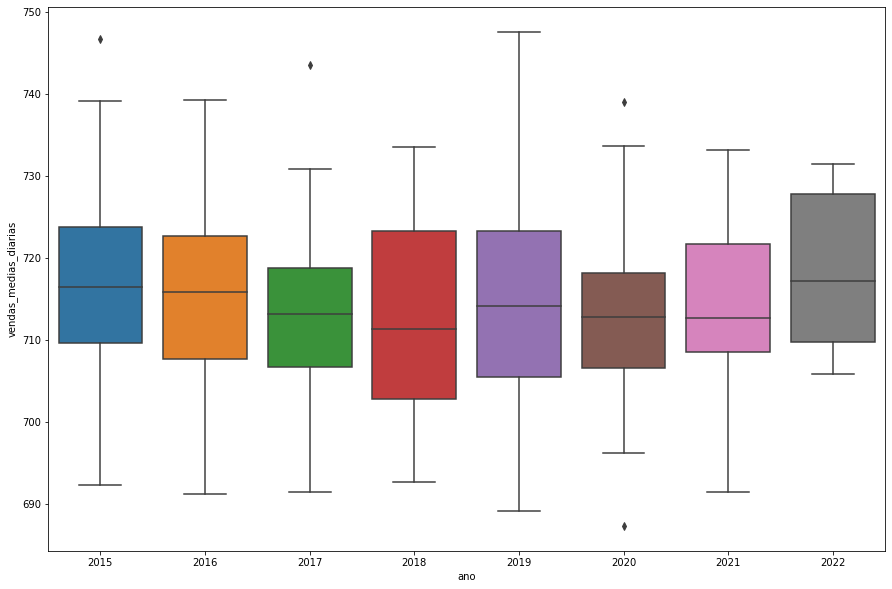

In [281]:
ax = sns.boxplot(x='ano', y = 'vendas_medias_diarias', data = estoque_df)
ax.figure.set_size_inches(15,10)
plt.xticks(rotation = 0);

A amplitude das vendas em 2019 foi a maior, a dispersão (medida pelo intervalo interquartil) é maior para 2018

Além de 2018, os gráfico boxplot de 2021 e 2022 também possuem assimetria positiva.

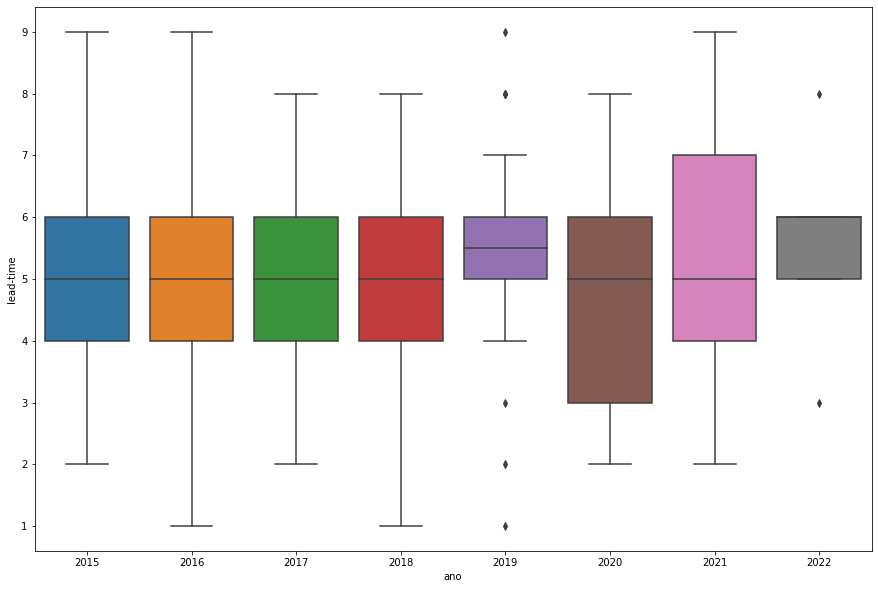

In [279]:
ax = sns.boxplot(x='ano', y = 'lead-time', data = estoque_df)
ax.figure.set_size_inches(15,10)
plt.xticks(rotation = 0);

O lead time tem uma distribuição bem simétrica, sendo que apenas: 

2020 possui assimetria negativa

2021 possui assimetria positiva

Usando QQ plot

fonte: https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html

In [282]:
from statsmodels.graphics.gofplots import qqplot

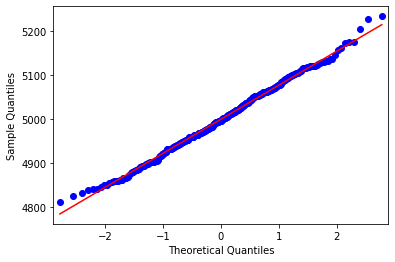

In [283]:
# line “s” - standardized line, the expected order statistics are scaled by the standard deviation of the given sample and have the mean added to them 
qqplot(estoque_df['vendas-iogurte'], line='s')
plt.show();

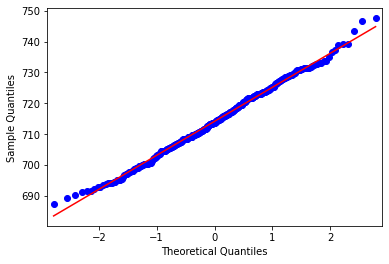

In [284]:
qqplot(estoque_df['vendas_medias_diarias'], line='s')
plt.show();

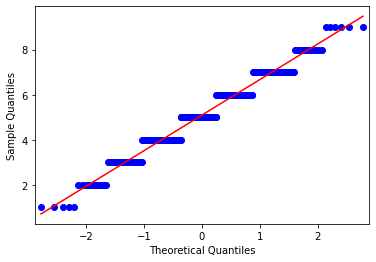

In [245]:
qqplot(estoque_df['lead-time'], line ='s')
plt.show();

O Q-Q plot (Quantile-Quantile Plot) é uma ferramenta mais poderosa para avaliar se uma distribuição é normal ou não. Como pode ser observado nos gŕaficos tanto do lead time como das vendas de iogurte e vendas médias diárias, os dados da amostra estão sobre a reta que assume uma distribuição Gaussiana.
Comparando com os gráficos anteriores: histograma, paiplot, boxplot, distplot, vemos que os mesmos também evidenciam uma distribuição normal desses dados.
Sendo assim, podemos assumir como normal a distribuição tanto do lead time como das vendas

## 2. Assuma que: 
##a. Os dados seguem uma distribuição normal.
##b. O time de vendas utilize para o produto em questão o nível de serviço de 99,87%
##c. O produto não tem sazonalidade (todos os meses vende valores próximos) e a demanda média passada é uma boa estimativa para a projetada, de acordo com o time de planejamento de demanda.
##Calcule, com os dados fornecidos, o estoque de segurança desejado.

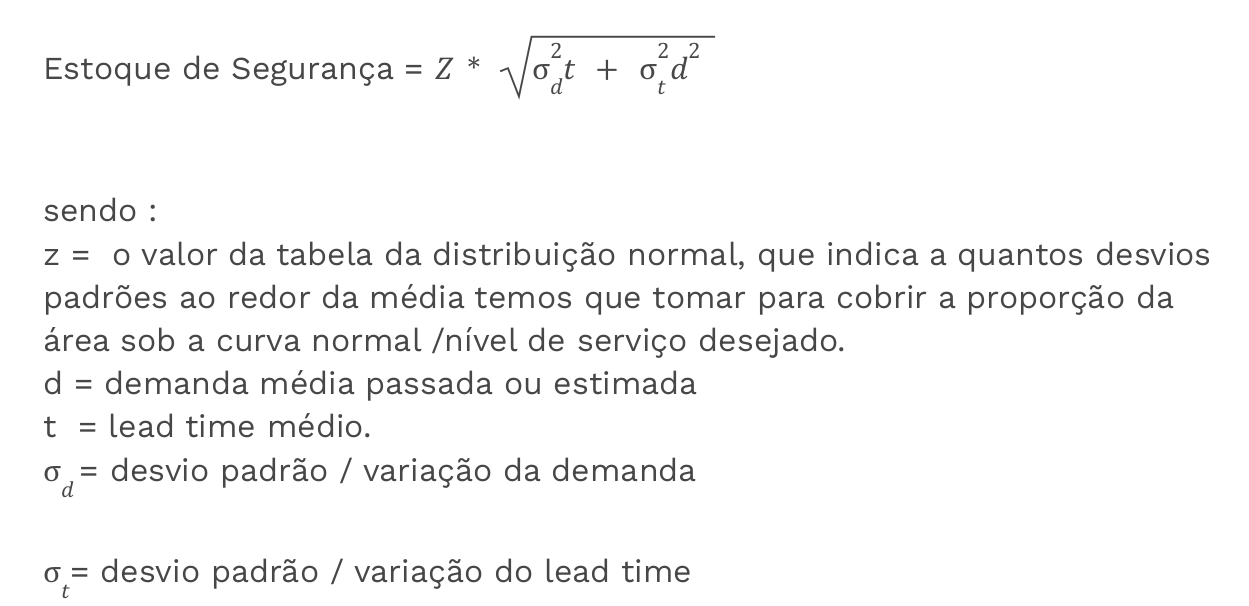

In [285]:
nivel_servico = 0.9987
nivel_servico

0.9987

In [286]:
# determinando o valor de z

z = norm.ppf(nivel_servico)
z

3.011453758499792

In [287]:
estoque_df.columns

Index(['data', 'vendas-iogurte', 'lead-time', 'vendas_medias_diarias', 'ano'], dtype='object')

In [289]:
estoque_df.describe()

,vendas-iogurte,lead-time,vendas_medias_diarias
count,370.000000,370.000000,370.000000
mean,4999.170270,5.094595,714.167181
std,77.285068,1.578728,11.040724
min,4811.000000,1.000000,687.285714
25%,4947.000000,4.000000,706.714286
50%,4996.000000,5.000000,713.714286
75%,5054.000000,6.000000,722.000000
max,5233.000000,9.000000,747.571429


In [290]:
# agrupando pelos anos para analisar a média e os desvios padrões

estoque_df_grouped_mean = estoque_df.groupby('ano').mean()
estoque_df_grouped_mean

,vendas-iogurte,lead-time,vendas_medias_diarias
ano,,,
2015,5019.038462,5.211538,717.005495
2016,5015.173077,5.057692,716.453297
2017,4991.452830,4.698113,713.064690
2018,4985.961538,5.115385,712.280220
2019,4997.615385,5.461538,713.945055
2020,4985.384615,4.807692,712.197802
2021,4996.865385,5.269231,713.837912
2022,5028.800000,5.600000,718.400000


In [291]:
media_media_vendas = estoque_df_grouped_mean['vendas_medias_diarias'].mean()
media_media_vendas

714.6480587808418

In [292]:
media_media_lead_time = estoque_df_grouped_mean['lead-time'].mean()
media_media_lead_time

5.152648766328011

Valores não tão discrepantes quando analisado o conjunto como um todo, quando foi usado o describe() no DataFrame completo sem separação por ano

In [293]:
estoque_df_grouped_std = estoque_df.groupby('ano').std()
estoque_df_grouped_std

,vendas-iogurte,lead-time,vendas_medias_diarias
ano,,,
2015,78.949217,1.563512,11.278460
2016,77.929008,1.742361,11.132715
2017,73.517807,1.352845,10.502544
2018,77.721968,1.436961,11.103138
2019,90.835372,1.488011,12.976482
2020,67.704998,1.657289,9.672143
2021,69.703020,1.716305,9.957574
2022,77.754100,1.816590,11.107729


In [294]:
std_std_vendas = estoque_df_grouped_std['vendas_medias_diarias'].mean()
std_std_vendas

10.966348034975876

In [295]:
std_std_lead_time = estoque_df_grouped_std['lead-time'].mean()
std_std_lead_time

1.596734224959654

In [303]:
estoque_seguranca = z * math.sqrt( ((std_std_vendas ** 2) * media_media_lead_time) + ( (std_std_lead_time ** 2) * (media_media_vendas ** 2) ))
estoque_seguranca_aproximado = math.ceil(estoque_seguranca)

In [305]:
print("O estoque de segurança aproximado dado o conjunto de dados avaliado é de %i iogurtes" % estoque_seguranca_aproximado)

O estoque de segurança aproximado dado o conjunto de dados avaliado é de 3438 iogurtes
